In [2]:
%reload_ext autoreload

%autoreload 2|


In [3]:
input_file = "../../test_data/system_tests/MaxQuant_boxcar/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv"
maxquant_file = "../../test_data/system_tests/MaxQuant_boxcar/proteinGroups.txt"
directlfq_file = "../../test_data/system_tests/MaxQuant_boxcar/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv.protein_intensities.tsv"

samplemap_directlfq = "../../test_data/system_tests/MaxQuant_boxcar/samplemap.directLFQ.tsv"

samplemap_maxquant = "../../test_data/system_tests/MaxQuant_boxcar/samplemap.maxLFQ.tsv"

benchmark_figure = "../../test_data/system_tests/MaxQuant_boxcar/benchmark_mqset.pdf"



run_directlfq = False

In [4]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="maxquant_evidence_benchmark",maximum_number_of_quadratic_ions_to_use_per_protein=10, min_nonan=1)



In [5]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils

samplemap_df_directlfq = lfqutils.load_samplemap(samplemap_directlfq)
samples_used_directlfq = lfqutils.get_samples_used_from_samplemap_df(samplemap_df_directlfq, cond1="dda12", cond2="dda2")
samplemap_df_maxlfq = lfqutils.load_samplemap(samplemap_maxquant)
samples_used_maxlfq = lfqutils.get_samples_used_from_samplemap_df(samplemap_df_maxlfq, cond1="dda12", cond2 = "dda2")

restable_directlfq = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_file, input_name="directLFQ", samples_c1=samples_used_directlfq[0], samples_c2=samples_used_directlfq[1])
restable_maxlfq = lfqbenchmark.ResultsTableMaxQuant(input_file=maxquant_file, input_name="maxLFQ", samples_c1=samples_used_maxlfq[0], samples_c2=samples_used_maxlfq[1])

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: invalid value encountered in double_scalars
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:

In [7]:
organism_annotator = lfqbenchmark.OrganismAnnotatorMaxQuant(mapping_file=maxquant_file)

organism_annotator.annotate_table_with_organism(restable_maxlfq)
organism_annotator.annotate_table_with_organism(restable_directlfq)

,LFQ intensity Shotgun_02-01_1,LFQ intensity Shotgun_02-01_2,LFQ intensity Shotgun_02-01_3,LFQ intensity Shotgun_12-01_1,LFQ intensity Shotgun_12-01_2,LFQ intensity Shotgun_12-01_3,protein,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,3643600000,2971500000,3188400000,3655800000,3605500000,4274800000,0,3.655800e+09,3.188400e+09,0.197355,3.422100e+09
1,5321900000,4503700000,4356100000,5657400000,5466200000,5410700000,1,5.466200e+09,4.503700e+09,0.279428,4.984950e+09
2,86756000,69719000,108880000,152760000,99195000,134370000,2,1.343700e+08,8.675600e+07,0.631176,1.105630e+08
3,317040000,421780000,412000000,444980000,503490000,385790000,3,4.449800e+08,4.120000e+08,0.111096,4.284900e+08
4,36886000,24031000,28317000,41376000,36666000,42425000,4,4.137600e+07,2.831700e+07,0.547126,3.484650e+07
...,...,...,...,...,...,...,...,...,...,...,...
6877,425360000,712670000,744970000,0,0,0,6877,0.000000e+00,7.126700e+08,-inf,3.563350e+08
6878,1869000000,1562200000,1564300000,2030200000,2050000000,2396400000,6878,2.050000e+09,1.564300e+09,0.390107,1.807150e+09
6879,96161000,86862000,123400000,51813000,122920000,119260000,6879,1.192600e+08,9.616100e+07,0.310586,1.077105e+08
6880,5546300000,5833600000,5821000000,6785000000,7053600000,7264400000,6880,7.053600e+09,5.821000e+09,0.277093,6.437300e+09


In [9]:
import seaborn as sns
import directlfq.visualizations as lfq_viz

class MultiOrganismMultiMethodBoxPlotAdapted(lfq_viz.MultiOrganismMultiMethodBoxPlot):
    def __init__(self, method_ratio_results_table, ax, organisms_to_plot, fcs_to_expect):
        super().__init__( method_ratio_results_table, ax, organisms_to_plot, fcs_to_expect)
    
    def plot_boxplot(self):
        color_palette = sns.color_palette(self._color_scheme.colorlist_hex, n_colors=len(self._fcs_to_expect))
        sns.violinplot(data=self._method_ratio_results_table, x="method", y = "log2fc", hue= "organism", palette=color_palette, hue_order=self._organisms_to_plot, ax=self.ax, linewidth=0.8)


/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:52: UserWarning: Trying to register the cmap 'alphapept_linear' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:52: UserWarning: Trying to register the cmap 'alphapept_linear_cut' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide 

Escherichia coli num:891 median_FC:-2.4 STD:0.57

Homo sapiens num:4996 median_FC:0.033 STD:0.32

Escherichia coli num:889 median_FC:-2.3 STD:0.86

Homo sapiens num:5006 median_FC:0.28 STD:0.33



/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_44572/1577112141.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(benchmark_figure, layout="tight", bbox_inches="tight", dpi=300)
/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_44572/1577112141.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(benchmark_figure.replace(".pdf", ".png"), layout="tight", bbox_inches="tight", dpi=300)


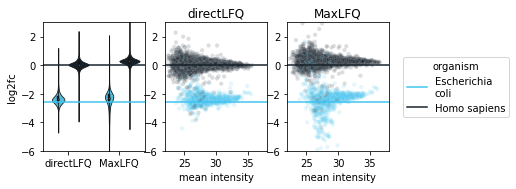

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import directlfq.visualizations as lfq_viz
import directlfq.benchmarking as lfq_benchmark
import numpy as np

methodname2resultsdf = {'directLFQ' : restable_directlfq.formated_dataframe, 'MaxLFQ' : restable_maxlfq.formated_dataframe}
organisms_to_plot =["Escherichia coli", "Homo sapiens"]
fcs_to_expect= [-np.log2(6), 0]

fig_length = 2.363
a4_width = 8.27
width_of_broader_dia_plot = 8.27
relative_width_of_broader_dia_plot = 4
relative_width_of_narrower_dda_plot = 3
width_of_narrower_dda_plot = 8.27*relative_width_of_narrower_dda_plot/relative_width_of_broader_dia_plot

fig, axes = plt.subplots(1, 3,figsize=(width_of_narrower_dda_plot,2.363 ))#, gridspec_kw={'width_ratios' : [1, 1, 1]})



merged_table = lfq_benchmark.ResultsTableMerger(method_name2results_df=methodname2resultsdf).merged_table


MultiOrganismMultiMethodBoxPlotAdapted(method_ratio_results_table=merged_table, ax = axes[0], organisms_to_plot=organisms_to_plot,fcs_to_expect= fcs_to_expect)

fcplotter_directLFQ = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[1], resultstable_w_ratios=restable_directlfq, organisms_to_plot = organisms_to_plot, fcs_to_expect= fcs_to_expect, title="directLFQ")

fcplotter_maxLFQ = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[2], resultstable_w_ratios= restable_maxlfq, organisms_to_plot = organisms_to_plot,  fcs_to_expect= fcs_to_expect, title= "MaxLFQ")


axes[0].set_ylim([-6, 3])
axes[1].set_ylim([-6, 3])
axes[1].set_xlim([22, 38])
axes[2].set_ylim([-6, 3])
axes[2].set_xlim([22, 38])


for ax in axes:
    ax.get_legend().remove()

for ax in axes[1:]:
    ax.set_ylabel("")

for ax in axes:
    ax.set_xlabel("mean intensity")
axes[0].set_xlabel("")


lines = axes[1].get_lines()
fig.legend(lines, ["Escherichia\ncoli", "Homo sapiens"], bbox_to_anchor=[1.05, 0.5], 
           loc='center', ncol=1, title = "organism")


fig.savefig(benchmark_figure, layout="tight", bbox_inches="tight", dpi=300)
fig.savefig(benchmark_figure.replace(".pdf", ".png"), layout="tight", bbox_inches="tight", dpi=300)

In [43]:
class ResultsTableMerger():
    def __init__(self, method_name2results_df):
        self._method_name2results_df = method_name2results_df
        self._list_of_tables = []

        self.merged_table = None

        self._define_merged_table()

    def _define_merged_table(self):
        self._collect_list_of_annotated_tables()
        self.merged_table = pd.concat(self._list_of_tables)
        self._filter_merged_table_for_valid_fcs()
    
    def _collect_list_of_annotated_tables(self):
        for method, df in self._method_name2results_df.items():
            self._add_method_column(method, df)
            self._list_of_tables.append(df)

    def _filter_merged_table_for_valid_fcs(self):
        is_valid = [np.isfinite(x) for x in self.merged_table["log2fc"]]
        self.merged_table = self.merged_table[is_valid]

    @staticmethod
    def _add_method_column(method, df):
        df["method"] = method
    
